In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: >

<Figure size 1200x600 with 0 Axes>

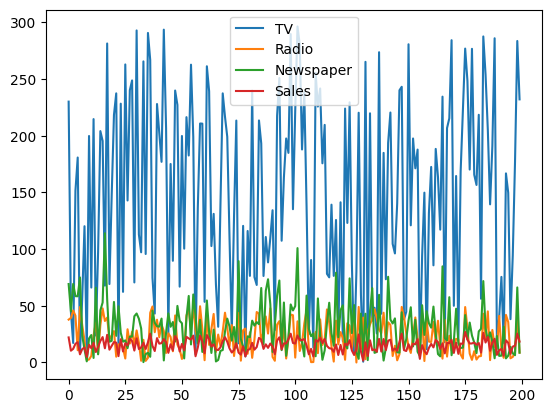

In [9]:
plt.figure(figsize = (12,6))
df.plot()

<Axes: >

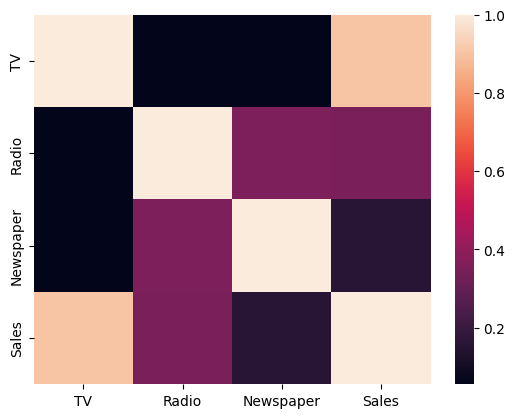

In [10]:
sns.heatmap(df.corr())

In [23]:
from sklearn.model_selection import train_test_split
X = df.drop('Sales',axis = 1)
y = df['Sales']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 42)
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [26]:
pred = rfr.predict(X_test)

In [27]:
PREDICTIONS = pd.DataFrame({'Real':y_test,'Predictions':pred})

In [28]:
PREDICTIONS

,Real,Predictions
95,16.9,17.403
15,22.4,22.427
30,21.4,19.814
158,7.3,6.283
128,24.7,22.874
115,12.6,13.975
69,22.3,22.625
170,8.4,9.720
174,16.5,17.172
45,16.1,16.849


In [30]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test, pred))
print(r2_score(y_test, pred))

1.5590453500000019
0.9442711788977762
